In [1]:
import os
import datetime as dt
import string
import numpy as np
import cv2
from PIL import Image

import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.backend as K
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential


In [2]:
# 为图像做一些变化 数据增强
def noise(img):
#     腐蚀
    if np.random.randint(2):
        n=np.random.randint(1,2)
        img = cv2.erode(img,np.ones((n,n),np.uint8))
#     膨胀
#     if np.random.randint(2):
    if 1:
        n=np.random.randint(4,7)
        img = cv2.dilate(img,np.ones((n,n),np.uint8))
#     噪点，仅将字符本身的部分白色像素变为黑色
    img = img_salt_pepper_noise(img,0.05)
#     黑色背景
    dst = np.zeros(img.shape, np.uint8)
#     随机的垂直方向的移动像素数，正为上，负为下
    v=np.random.randint(-6,7)
#     随机的水平方向的移动像素数，正为左，负为右
    h=np.random.randint(-6,7)
#     print(v,h)
#     平移变换
    for i in range(max(0,v),min(img.shape[0],img.shape[0]+v)):
        for j in range(max(0,h),min(img.shape[1],img.shape[1]+h)):
            dst[i-v, j-h] = img[i, j]
    img=dst

    height, width = img.shape[0],img.shape[1]
#     旋转变换
    if np.random.randint(2):
        matRotate = cv2.getRotationMatrix2D((height*0.5, width*0.5), np.random.randint(-6, 8), 1+np.random.randint(-30, 30)/100)
        img = cv2.warpAffine(img, matRotate, (width, height))
    return img

In [3]:
# 为图像增加噪点
def img_salt_pepper_noise(src,percetage):
    NoiseNum=int(percetage*src.shape[0]*src.shape[1])
    for i in range(NoiseNum):
        randX=np.random.randint(src.shape[0])
        randY=np.random.randint(src.shape[1])
        if src[randX,randY]==255:
            src[randX,randY]=0
    return src

# 生成图像
# img_dir:生成图像所存放的文件夹路径
# n:每种图像的生成数量
# tag:用以区分不同批次生成的图像
# state:normal表示仅生成16进制内的字符，即正常字符，带点；共32种
# state:其它值则会生成全部的256种图像
def gen_data(img_dir,n,tag='',state='all'):
    for i in os.listdir('myfont'):
        m=n
#         倘若state为normal,则跳过X开头的种类的图片的生成
        if state=='normal' and i[0]=='X':continue
        img = cv2.imread(f'myfont/{i}',0)
        ret,img = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
        while m:
            m-=1
            cv2.imwrite(f'{img_dir}/{i[:-4]}_{m}{tag}.png',noise(img.copy()))

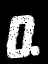

In [7]:
# 测试noise函数
img = cv2.imread('myfont/0..png',0)
Image.fromarray(noise(img))

In [8]:
# 设置所生成的图像的存放文件夹
img_dir='img_dir_lcd_single_paperEdition2'

In [702]:
# 生成图像
gen_data(img_dir,100,tag='a')

In [9]:
# 256个类别的编号
chars = 'X0 X1 X2 X3 X4 X5 X6 X7 X8 X9 X10 X11 X12 X13 X14 X15 X16 X17 X18 X19 X20 X21 X22 X23 X24 X25 X26 X27 X28 X29 X30 X31 X32 X33 X34 X35 X36 X37 X38 X39 X40 X41 X42 X43 X44 X45 X46 X47 X48 X49 X50 X51 X52 X53 X54 X55 X56 X57 X58 X59 X60 X61 X62 X63 X64 X65 X66 X67 X68 X69 X70 X71 X72 X73 X74 X75 X76 X77 X78 X79 X80 X81 X82 X83 X84 X85 X86 X87 X88 X89 X90 X91 X92 X93 X94 X95 X96 X97 X98 X99 X100 X101 X102 X103 X104 X105 X106 X107 X108 X109 X110 X111 X112 X113 X114 X115 X116 X117 X118 X119 X120 X121 X122 X123 X124 X125 X126 X127 X128 X129 X130 X131 X132 X133 X134 X135 X136 X137 X138 X139 X140 X141 X142 X143 X144 X145 X146 X147 X148 X149 X150 X151 X152 X153 X154 X155 X156 X157 X158 X159 X160 X161 X162 X163 X164 X165 X166 X167 X168 X169 X170 X171 X172 X173 X174 X175 X176 X177 X178 X179 X180 X181 X182 X183 X184 X185 X186 X187 X188 X189 X190 X191 X192 X193 X194 X195 X196 X197 X198 X199 X200 X201 X202 X203 X204 X205 X206 X207 X208 X209 X210 X211 X212 X213 X214 X215 X216 X217 X218 X219 X220 X221 X222 0 1 2 3 4 5 6 7 8 9 A B C D E F 0. 1. 2. 3. 4. 5. 6. 7. 8. 9. A. B. C. D. E. F. _'
chars = np.array(chars.split())

# 每一个编号所对应的整数编码，这里取编号在列表中的索引值
idx = np.arange(len(chars))

# 映射编号到整数编码
char_map = dict(zip(chars,idx))
# 映射整数编码到编号
idx_map = dict(zip(idx,chars))
idx_map[-1] = '' # -1映射到空

In [266]:
model = Sequential([
    Reshape((64, 48, 1), input_shape=(64, 48)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(len(chars), activation='softmax')
])

In [10]:
model=tf.keras.models.load_model('models/sig_lcd_model_paperEdition.h5')

In [267]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 64, 48, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 62, 46, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 23, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 10, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 8, 128)        73856     
_________________________________________________________________
flatten (Flatten)            (None, 12288)             0

In [268]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy']
)

In [256]:
# 为加载数据
# img_dir:图像的路径
# 返回两个列表x,y_
# x:(n,64,48) 图像列表
# y:(n,256),每一张图像的整数编码所对应的独热码标签
def load_data(img_dir):
    x=[]
    y=[]
    for i in os.listdir(img_dir):
#         if i[0]=='X':continue
        x.append(cv2.imread(f'{img_dir}/{i}',0))
        y.append(i.split('_')[0] if i[0]!='_' else '_')
    x=np.array(x)
    y=np.array(y)
    y_=np.array([char_map[i] for i in y])
    y_=keras.utils.to_categorical(y_,256)
    print(x.shape,y.shape,y_.shape)
    return x,y_

In [703]:
# 加载数据
x,y_=load_data(img_dir)

(51200, 64, 48) (51200,) (51200, 256)


In [704]:
model.fit(x, y_, epochs=3, batch_size=16, verbose=1)

Train on 51200 samples
Epoch 1/3
51200/51200 [==============================] - ETA: 0s - loss: 0.0871 - accuracy: 0.97 - 54s 1ms/sample - loss: 0.0871 - accuracy: 0.9757
Epoch 2/3
51200/51200 [==============================] - 55s 1ms/sample - loss: 0.0419 - accuracy: 0.9875
Epoch 3/3
51200/51200 [==============================] - 55s 1ms/sample - loss: 0.0353 - accuracy: 0.9905


In [12]:
# 为整数编码到类别编号的转换
# predicted是模型返回的列表，每一个元素是0-255的整数
# 返回一个列表，每个元素是相应位置的整数所对应的类别编号
def change(predicted):
    l=[]
    for i in predicted:
        i=i.tolist()
        l.append(idx_map[i.index(max(i))])
    return l

# 为模型的测试
# test_imgs:测试图片列表
# test_labels:测试图片的类别编号列表
# p:输出标志
def test(test_imgs,test_labels,p=True):
    n=len(test_imgs)
    pre = model.predict(np.array(test_imgs))
    pre = change(pre)
    errs=[]
    for i in range(len(test_labels)):
        if test_labels[i]!=pre[i]:
            errs.append(i)
    if p:
        print(f'总数：{n} | 错误：{len(errs)} | 准确率：{(n-len(errs))/n}')
    return pre,errs

In [13]:
# 模型测试
n=500
test_filenames = np.array(os.listdir('myfont'))[np.random.randint(256,size=n)]
# 仅测试正常字符可将下一行注释解除
# test_filenames = [i for i in test_filenames if i[0]!='X']
n=len(test_filenames)
test_imgs=list(map(lambda x: noise(cv2.imread(f'myfont/{x}',0)), test_filenames))
test_labels = list(map(lambda x: x[:-4],test_filenames))
test_codes = list(map(lambda x: char_map[x],test_labels))
pre,errs = test(test_imgs,test_labels)

总数：500 | 错误：16 | 准确率：0.968


89
X141 ==> X149


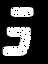

In [18]:
i=errs[np.random.randint(len(errs))]
print(i)
print(f'{test_labels[i]} ==> {pre[i]}')
Image.fromarray(test_imgs[i])

In [23]:
# 截取图片再送入模型识别，更详细的解释在cut_test文件中
s = dt.datetime.now()
i='24'
img_path=f'test_imgs/raw_{i}.jpg'
raw = cv2.imread(img_path, 0)
ret, mask = cv2.threshold(raw, max(map(max, np.array(raw))) - 10, 255, cv2.THRESH_BINARY)

# 膨胀
dilate = cv2.dilate(mask,np.ones((8,8),np.uint8),iterations=5)

# 获取数字区
contours, hierarchy = cv2.findContours(dilate,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
ls=list(map(lambda x:cv2.contourArea(x),contours))
max_id=np.argmax(ls)
max_con= contours[max_id]
max_con=max_con.reshape(-1,2)
col=max_con[:,0]
row=max_con[:,1]
digit_area=mask[min(row):max(row), min(col):max(col)]

# 旋转
coords = np.column_stack(np.where(digit_area > 0))
angle = cv2.minAreaRect(coords)[-1]
if angle < -45:
    angle = -(90+ angle)
else:
    angle = -angle

h, w = digit_area.shape[:2]
center = (w//2, h//2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
digit_area = cv2.warpAffine(digit_area, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

# 取出边缘的黑色，并切割为8个图像
white_col = np.argwhere(digit_area == 255)[:,1]
digit_area=digit_area[:,min(white_col):max(white_col)]
w=round(digit_area.shape[1]/8)
digits=[]
bg=np.zeros((64,48),dtype=np.uint8)
for i in range(8):
    d=digit_area[:,i*w:(i+1)*w]
    white_row=np.argwhere(d==255)[:,0]
    d=d[min(white_row):max(white_row),:]
    d=cv2.resize(d,(48,d.shape[0]*48//d.shape[1]))
    _=bg.copy()
    if d.shape[0]>=64:
        _[0:d.shape[0],0:48]=d
    else:
        _[31-d.shape[0]//2:31-d.shape[0]//2+d.shape[0],0:48]=d
    digits.append(_)

# 送入模型
pre=change(model.predict(np.array(digits)))
print(pre)

e = dt.datetime.now()
print(e-s)

['E', '0', '2', '8', '0', '2', '4.', '0']
0:00:00.695170


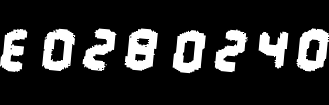

In [24]:
# 测试 所截取的数字区域
Image.fromarray(digit_area)

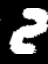

In [395]:
# 测试 所截取的单个数字
i=5
Image.fromarray(digits[i])

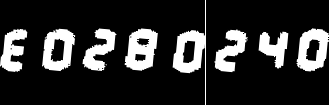

In [25]:
# 测试 单个数字的切割线
tmp=digit_area.copy()
w=round(tmp.shape[1]/8)
i=5
Image.fromarray(cv2.line(tmp,(i*w,0),(i*w,tmp.shape[0]),(255)))

In [712]:
model.save('models/sig_lcd_model_paperEdition.h5')